# Analysis for ReproHum2021 Experiment

This notebook contains the analysis work performed for the reproduction experiment comparing
hedged and non-hedged NLG texts.

In [53]:
import pandas as pd
from scipy import stats
import pingouin as pg

In [20]:
dataset_df = pd.read_csv("data/hedging_dataset.csv", sep=";")
dataset_df.head()

,ID,start_time,completion_time,gender,age,english_language_proficiency,sc1_opinion,sc1_rating,sc1_why,sc2_opinion,sc2_rating,sc2_why
0,1,8/2/21 14:50:41,8/2/21 14:54:07,Male,25-34 years old,"Non-native, but fluent",Maybe,-2,A bit more formal.,Maybe,-2,More formal
1,2,8/2/21 14:49:28,8/2/21 14:58:59,Male,25-34 years old,"Non-native, but fluent",Yes,-2,A is more direct. Don't think the adverbs in B...,No,-1,"Again, do not think that the adverbs add value..."
2,3,8/2/21 18:13:14,8/2/21 18:26:54,Male,25-34 years old,"Non-native, but fluent",Yes,0,The text doesn't tell you anything that the ta...,Maybe,-1,"""Average results in X. This result is extremel..."
3,4,8/4/21 12:11:04,8/4/21 12:24:19,Male,25-34 years old,"Non-native, but fluent",Yes,-2,"The outcome is positive, so it can be conveyed...",No,2,"The outcome is negative, so there can be certa..."
4,5,8/5/21 7:45:50,8/5/21 8:03:16,Male,35-44 years old,Native,No,-3,The second one has a kind of conflict between ...,No,-3,B sounds disingenuous. The degree qualificatio...


In [21]:
# Describe Likert ratings for scenario 1:
dataset_df['sc1_rating'].describe()

count    11.000000
mean     -2.090909
std       1.044466
min      -3.000000
25%      -3.000000
50%      -2.000000
75%      -1.500000
max       0.000000
Name: sc1_rating, dtype: float64

In [22]:
# Describe Likert ratings for scenario 2:
dataset_df['sc2_rating'].describe()

count    11.000000
mean     -1.363636
std       1.858641
min      -3.000000
25%      -3.000000
50%      -2.000000
75%      -1.000000
max       2.000000
Name: sc2_rating, dtype: float64

## Participant Analysis

<AxesSubplot:ylabel='gender'>

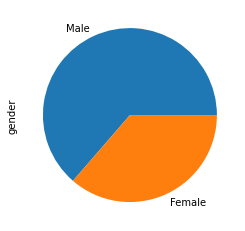

In [23]:
# Gender:
dataset_df['gender'].value_counts().plot(kind='pie')

<AxesSubplot:>

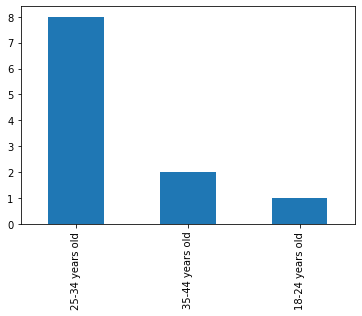

In [24]:
# Age
dataset_df['age'].value_counts().plot(kind='bar')

<AxesSubplot:>

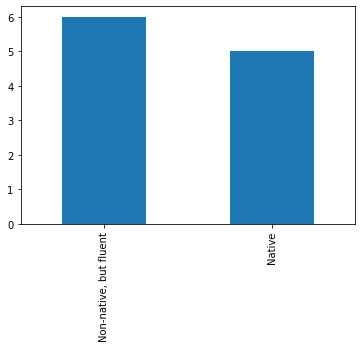

In [25]:
# Language proficiency:
dataset_df['english_language_proficiency'].value_counts().plot(kind='bar')


## Statistical Analysis

In [28]:
# Scenario 1:
sc1_mean = dataset_df['sc1_rating'].mean()
sc1_std = dataset_df['sc1_rating'].std()

print(f"Scenario 1 Overall Mean Average Score: {sc1_mean} ({sc1_std} std.)")

Scenario 1 Overall Mean Average Score: -2.090909090909091 (1.044465935734187 std.)


In [29]:
# Scenario 2:
sc2_mean = dataset_df['sc2_rating'].mean()
sc2_std = dataset_df['sc2_rating'].std()

print(f"Scenario 2 Overall Mean Average Score: {sc2_mean} ({sc2_std} std.)")

Scenario 2 Overall Mean Average Score: -1.3636363636363635 (1.85864075456917 std.)


## By Language Proficiency

In [37]:
# Descriptive statistics
dataset_df.drop(['ID'], axis=1).groupby('english_language_proficiency').describe()

sc1_rating                                      \
                                  count mean       std  min   25%  50%  75%   
english_language_proficiency                                                  
Native                              5.0 -2.2  1.095445 -3.0 -3.00 -3.0 -1.0   
Non-native, but fluent              6.0 -2.0  1.095445 -3.0 -2.75 -2.0 -2.0   

                                  sc2_rating                                 \
                              max      count      mean       std  min   25%   
english_language_proficiency                                                  
Native                       -1.0        5.0 -1.400000  2.073644 -3.0 -3.00   
Non-native, but fluent        0.0        6.0 -1.333333  1.861899 -3.0 -2.75   

                                             
                              50%  75%  max  
english_language_proficiency                 
Native                       -2.0 -1.0  2.0  
Non-native, but fluent       -1.5 -1.0  2.0

In [30]:
# Native English:
native_english_df = dataset_df.loc[dataset_df['english_language_proficiency'] == "Native"]
# Non-Native, Fluent English:
fluent_english_df = dataset_df.loc[dataset_df['english_language_proficiency'] == 'Non-native, but fluent']

In [31]:
# Scenario 1 (Native):
sc1_mean = native_english_df['sc1_rating'].mean()
sc1_std = native_english_df['sc1_rating'].std()

print(f"Scenario 1 Native Mean Average Score: {sc1_mean} ({sc1_std} std.)")

Scenario 1 Native Mean Average Score: -2.2 (1.0954451150103321 std.)


In [33]:
# Scenario 2 (Native):
sc2_mean = native_english_df['sc2_rating'].mean()
sc2_std = native_english_df['sc2_rating'].std()

print(f"Scenario 2 Native Mean Average Score: {sc2_mean} ({sc2_std} std.)")

Scenario 2 Native Mean Average Score: -1.4 (2.073644135332772 std.)


In [34]:
# Scenario 1 (Fluent):
sc1_mean = fluent_english_df['sc1_rating'].mean()
sc1_std = fluent_english_df['sc1_rating'].std()

print(f"Scenario 1 Fluent Mean Average Score: {sc1_mean} ({sc1_std} std.)")

Scenario 1 Fluent Mean Average Score: -2.0 (1.0954451150103321 std.)


In [35]:
# Scenario 2:
sc2_mean = fluent_english_df['sc2_rating'].mean()
sc2_std = fluent_english_df['sc2_rating'].std()

print(f"Scenario 2 Fluent Mean Average Score: {sc2_mean} ({sc2_std} std.)")

Scenario 2 Fluent Mean Average Score: -1.3333333333333333 (1.8618986725025255 std.)


### Data Normality and Homogeneity Checks

Native Speakers:

In [47]:
# Check for Data Normality using the Shapiro-Wilks test:
stats.shapiro(native_english_df['sc1_rating'])

ShapiroResult(statistic=0.6840287446975708, pvalue=0.006469968240708113)

In [46]:
stats.shapiro(native_english_df['sc2_rating'])


ShapiroResult(statistic=0.8421509861946106, pvalue=0.17095594108104706)

Fluent Speakers:

In [48]:
stats.shapiro(fluent_english_df['sc1_rating'])

ShapiroResult(statistic=0.8137412071228027, pvalue=0.07784329354763031)

In [49]:
stats.shapiro(fluent_english_df['sc2_rating'])



ShapiroResult(statistic=0.8616126775741577, pvalue=0.19476796686649323)

Homogeneity Check (Scenario 1):

In [50]:
stats.levene(native_english_df['sc1_rating'], fluent_english_df['sc1_rating'])


LeveneResult(statistic=0.05365126676602093, pvalue=0.8220079481989209)

Homogeneity Check (Scenario 2):

In [51]:
stats.levene(native_english_df['sc2_rating'], fluent_english_df['sc2_rating'])


LeveneResult(statistic=0.0068040068040068, pvalue=0.9360653412936365)

Two-Sample T-test (Scenario 1):

In [58]:
pg.ttest(native_english_df['sc1_rating'],
                fluent_english_df['sc1_rating'], correction=False)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-0.301511,9,two-sided,0.769875,"[-1.7, 1.3]",0.182574,0.495,0.058442


Two-Sample T-test (Scenario 2):

In [59]:
pg.ttest(native_english_df['sc2_rating'],
                fluent_english_df['sc2_rating'], correction=False)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-0.056205,9,two-sided,0.956406,"[-2.75, 2.62]",0.034034,0.481,0.050292
